<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/HW5/HW5_Assignment1_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pylab as plt

##**Task 6.0: Gather Second City Data from Repository**
---

In [3]:
chi = pd.read_csv("https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Chicago/chi_final.csv?raw=true")

In [4]:
print("there are (rows, columns) = ", (chi.shape), "in the dataframe")

there are (rows, columns) =  (2688, 19) in the dataframe


In [5]:
chi.columns

Index(['Unnamed: 0', 'ID', 'ZIP.Code', 'Community.Area',
       'Primary.Property.Type', 'Gross.Floor.Area...Buildings..sq.ft.',
       'Year.Built', 'X..of.Buildings', 'ENERGY.STAR.Score',
       'Electricity.Use..kBtu.', 'Natural.Gas.Use..kBtu.',
       'Site.EUI..kBtu.sq.ft.', 'Source.EUI..kBtu.sq.ft.',
       'Weather.Normalized.Site.EUI..kBtu.sq.ft.',
       'Weather.Normalized.Source.EUI..kBtu.sq.ft.',
       'Total.GHG.Emissions..Metric.Tons.CO2e.',
       'GHG.Intensity..kg.CO2e.sq.ft.', 'total_site_energy_KBTU',
       'log_total_site_energy_KBTU'],
      dtype='object')

In [6]:
chi.describe()

,Unnamed: 0,ID,Gross.Floor.Area...Buildings..sq.ft.,Year.Built,X..of.Buildings,ENERGY.STAR.Score,Electricity.Use..kBtu.,Natural.Gas.Use..kBtu.,Site.EUI..kBtu.sq.ft.,Source.EUI..kBtu.sq.ft.,Weather.Normalized.Site.EUI..kBtu.sq.ft.,Weather.Normalized.Source.EUI..kBtu.sq.ft.,Total.GHG.Emissions..Metric.Tons.CO2e.,GHG.Intensity..kg.CO2e.sq.ft.,total_site_energy_KBTU,log_total_site_energy_KBTU
count,2688.000000,2688.000000,2.688000e+03,2688.000000,2688.000000,2688.000000,2.688000e+03,2.688000e+03,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2.688000e+03,2688.000000
mean,1344.500000,184502.570312,2.448678e+05,1962.942336,1.405878,57.507812,1.076602e+07,1.172915e+07,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,2.298315e+07,16.304023
std,776.103086,59873.199256,3.964045e+05,36.294735,5.201993,29.352026,2.495836e+07,2.722341e+07,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,4.971672e+07,1.015335
min,1.000000,100001.000000,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,1.580000e+04,9.667765
25%,672.750000,120464.000000,7.500000e+04,1928.000000,1.000000,34.000000,1.947257e+06,3.182139e+06,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,5.838643e+06,15.580009
50%,1344.500000,173712.500000,1.237265e+05,1969.000000,1.000000,62.000000,4.024877e+06,5.561839e+06,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,1.049675e+07,16.166576
75%,2016.250000,251356.500000,2.521352e+05,1997.000000,1.000000,83.000000,9.702889e+06,1.168477e+07,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,2.202188e+07,16.907547
max,2688.000000,260184.000000,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,1.155374e+09,20.867690


##**Task 6.1: Clean the Data**
---

In [7]:
# summarize the number of rows with missing values for each column
for c in chi.columns:

  # count number of rows with missing values
  n_miss = chi[c].isnull().sum()
  perc = n_miss / chi.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chi[c].dtype,
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
ZIP.Code (object):  Missing: 0 (0.0%)
Community.Area (object):  Missing: 0 (0.0%)
Primary.Property.Type (object):  Missing: 0 (0.0%)
Gross.Floor.Area...Buildings..sq.ft. (float64):  Missing: 0 (0.0%)
Year.Built (int64):  Missing: 0 (0.0%)
X..of.Buildings (int64):  Missing: 0 (0.0%)
ENERGY.STAR.Score (int64):  Missing: 0 (0.0%)
Electricity.Use..kBtu. (float64):  Missing: 0 (0.0%)
Natural.Gas.Use..kBtu. (float64):  Missing: 0 (0.0%)
Site.EUI..kBtu.sq.ft. (float64):  Missing: 0 (0.0%)
Source.EUI..kBtu.sq.ft. (float64):  Missing: 0 (0.0%)
Weather.Normalized.Site.EUI..kBtu.sq.ft. (float64):  Missing: 30 (1.1%)
Weather.Normalized.Source.EUI..kBtu.sq.ft. (float64):  Missing: 30 (1.1%)
Total.GHG.Emissions..Metric.Tons.CO2e. (float64):  Missing: 15 (0.6%)
GHG.Intensity..kg.CO2e.sq.ft. (float64):  Missing: 15 (0.6%)
total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
log_total_site_energy_KBTU (float64):  Missing: 0 (0.0%)


In [8]:
#removing features that had missing values for greater than 40% of the buildings in the dataset
for c in chi.columns:

  # count number of rows with missing values
  n_miss = chi[c].isnull().sum()
  perc = n_miss / chi.shape[0] * 100
  if perc > 40:
    chi.drop(c, axis=1, inplace=True)

#cleaned the datasets by removing irrelevant building-identifying features
chi.drop(['ID', 'ZIP.Code', 'Community.Area'], axis=1, inplace=True)
#cleaned the datasets by removing indescript/redundant features
chi.drop(['Unnamed: 0'], axis=1, inplace=True)

print("there are (rows, columns) = ", (chi.shape), "in the dataframe")

there are (rows, columns) =  (2688, 15) in the dataframe


In [9]:
for c in chi.columns:

  # count number of rows with missing values
  n_miss = chi[c].isnull().sum()
  perc = n_miss / chi.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chi[c].dtype,
                                                  n_miss, perc))

Primary.Property.Type (object):  Missing: 0 (0.0%)
Gross.Floor.Area...Buildings..sq.ft. (float64):  Missing: 0 (0.0%)
Year.Built (int64):  Missing: 0 (0.0%)
X..of.Buildings (int64):  Missing: 0 (0.0%)
ENERGY.STAR.Score (int64):  Missing: 0 (0.0%)
Electricity.Use..kBtu. (float64):  Missing: 0 (0.0%)
Natural.Gas.Use..kBtu. (float64):  Missing: 0 (0.0%)
Site.EUI..kBtu.sq.ft. (float64):  Missing: 0 (0.0%)
Source.EUI..kBtu.sq.ft. (float64):  Missing: 0 (0.0%)
Weather.Normalized.Site.EUI..kBtu.sq.ft. (float64):  Missing: 30 (1.1%)
Weather.Normalized.Source.EUI..kBtu.sq.ft. (float64):  Missing: 30 (1.1%)
Total.GHG.Emissions..Metric.Tons.CO2e. (float64):  Missing: 15 (0.6%)
GHG.Intensity..kg.CO2e.sq.ft. (float64):  Missing: 15 (0.6%)
total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
log_total_site_energy_KBTU (float64):  Missing: 0 (0.0%)


##**Task 6.2: Transform Input Feature as Needed**
---

In [10]:
chi.describe()

,Gross.Floor.Area...Buildings..sq.ft.,Year.Built,X..of.Buildings,ENERGY.STAR.Score,Electricity.Use..kBtu.,Natural.Gas.Use..kBtu.,Site.EUI..kBtu.sq.ft.,Source.EUI..kBtu.sq.ft.,Weather.Normalized.Site.EUI..kBtu.sq.ft.,Weather.Normalized.Source.EUI..kBtu.sq.ft.,Total.GHG.Emissions..Metric.Tons.CO2e.,GHG.Intensity..kg.CO2e.sq.ft.,total_site_energy_KBTU,log_total_site_energy_KBTU
count,2.688000e+03,2688.000000,2688.000000,2688.000000,2.688000e+03,2.688000e+03,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2.688000e+03,2688.000000
mean,2.448678e+05,1962.942336,1.405878,57.507812,1.076602e+07,1.172915e+07,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,2.298315e+07,16.304023
std,3.964045e+05,36.294735,5.201993,29.352026,2.495836e+07,2.722341e+07,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,4.971672e+07,1.015335
min,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,1.580000e+04,9.667765
25%,7.500000e+04,1928.000000,1.000000,34.000000,1.947257e+06,3.182139e+06,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,5.838643e+06,15.580009
50%,1.237265e+05,1969.000000,1.000000,62.000000,4.024877e+06,5.561839e+06,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,1.049675e+07,16.166576
75%,2.521352e+05,1997.000000,1.000000,83.000000,9.702889e+06,1.168477e+07,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,2.202188e+07,16.907547
max,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,1.155374e+09,20.867690


In [11]:
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Primary.Property.Type                       2688 non-null   object 
 1   Gross.Floor.Area...Buildings..sq.ft.        2688 non-null   float64
 2   Year.Built                                  2688 non-null   int64  
 3   X..of.Buildings                             2688 non-null   int64  
 4   ENERGY.STAR.Score                           2688 non-null   int64  
 5   Electricity.Use..kBtu.                      2688 non-null   float64
 6   Natural.Gas.Use..kBtu.                      2688 non-null   float64
 7   Site.EUI..kBtu.sq.ft.                       2688 non-null   float64
 8   Source.EUI..kBtu.sq.ft.                     2688 non-null   float64
 9   Weather.Normalized.Site.EUI..kBtu.sq.ft.    2658 non-null   float64
 10  Weather.Norm

###**Throw Away Data Where the Target Variable is Missing**
---

In [12]:
chi["total_site_energy_KBTU"].isna().sum()

0

In [13]:
original_len = chi.shape[0]
chi.dropna(subset=['total_site_energy_KBTU'])

print("I lost {:.2f}% of the data".format((1 - (chi.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [14]:
# isolate the target variable first (endogenous)
y = chi['total_site_energy_KBTU'].values

In [15]:
# and the input variables (exogenous)
X = chi.drop('total_site_energy_KBTU', axis=1)

###**Separate Categorical and Numerical Values**
---

In [16]:
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [17]:
X_numeric_data.shape

(2688, 13)

In [19]:
X_numeric_data.head()

,Gross.Floor.Area...Buildings..sq.ft.,Year.Built,X..of.Buildings,ENERGY.STAR.Score,Electricity.Use..kBtu.,Natural.Gas.Use..kBtu.,Site.EUI..kBtu.sq.ft.,Source.EUI..kBtu.sq.ft.,Weather.Normalized.Site.EUI..kBtu.sq.ft.,Weather.Normalized.Source.EUI..kBtu.sq.ft.,Total.GHG.Emissions..Metric.Tons.CO2e.,GHG.Intensity..kg.CO2e.sq.ft.,log_total_site_energy_KBTU
0,99000.0,2000,1,96,1935003.2,2783435.5,47.7,90.9,46.7,87.8,504.5,5.1,15.367807
1,92072.0,2014,1,55,2477744.2,3147551.1,61.1,120.4,63.6,123.0,623.9,6.8,15.542838
2,136000.0,1924,1,24,5724360.2,1951759.8,56.4,147.2,59.8,157.4,1158.8,8.5,15.852879
3,182246.0,1964,1,41,3158535.8,17010259.2,110.7,152.4,121.1,163.3,1485.7,8.2,16.819937
4,193497.0,1930,1,94,3620381.1,5465540.1,47.0,88.4,48.8,89.0,957.6,4.9,16.023165


In [20]:
X_categorical_data.shape

(2688, 1)

###**TASK 6.2.1: Make a Scatter Plot to Assess Covariance of Numerical Variables**
---

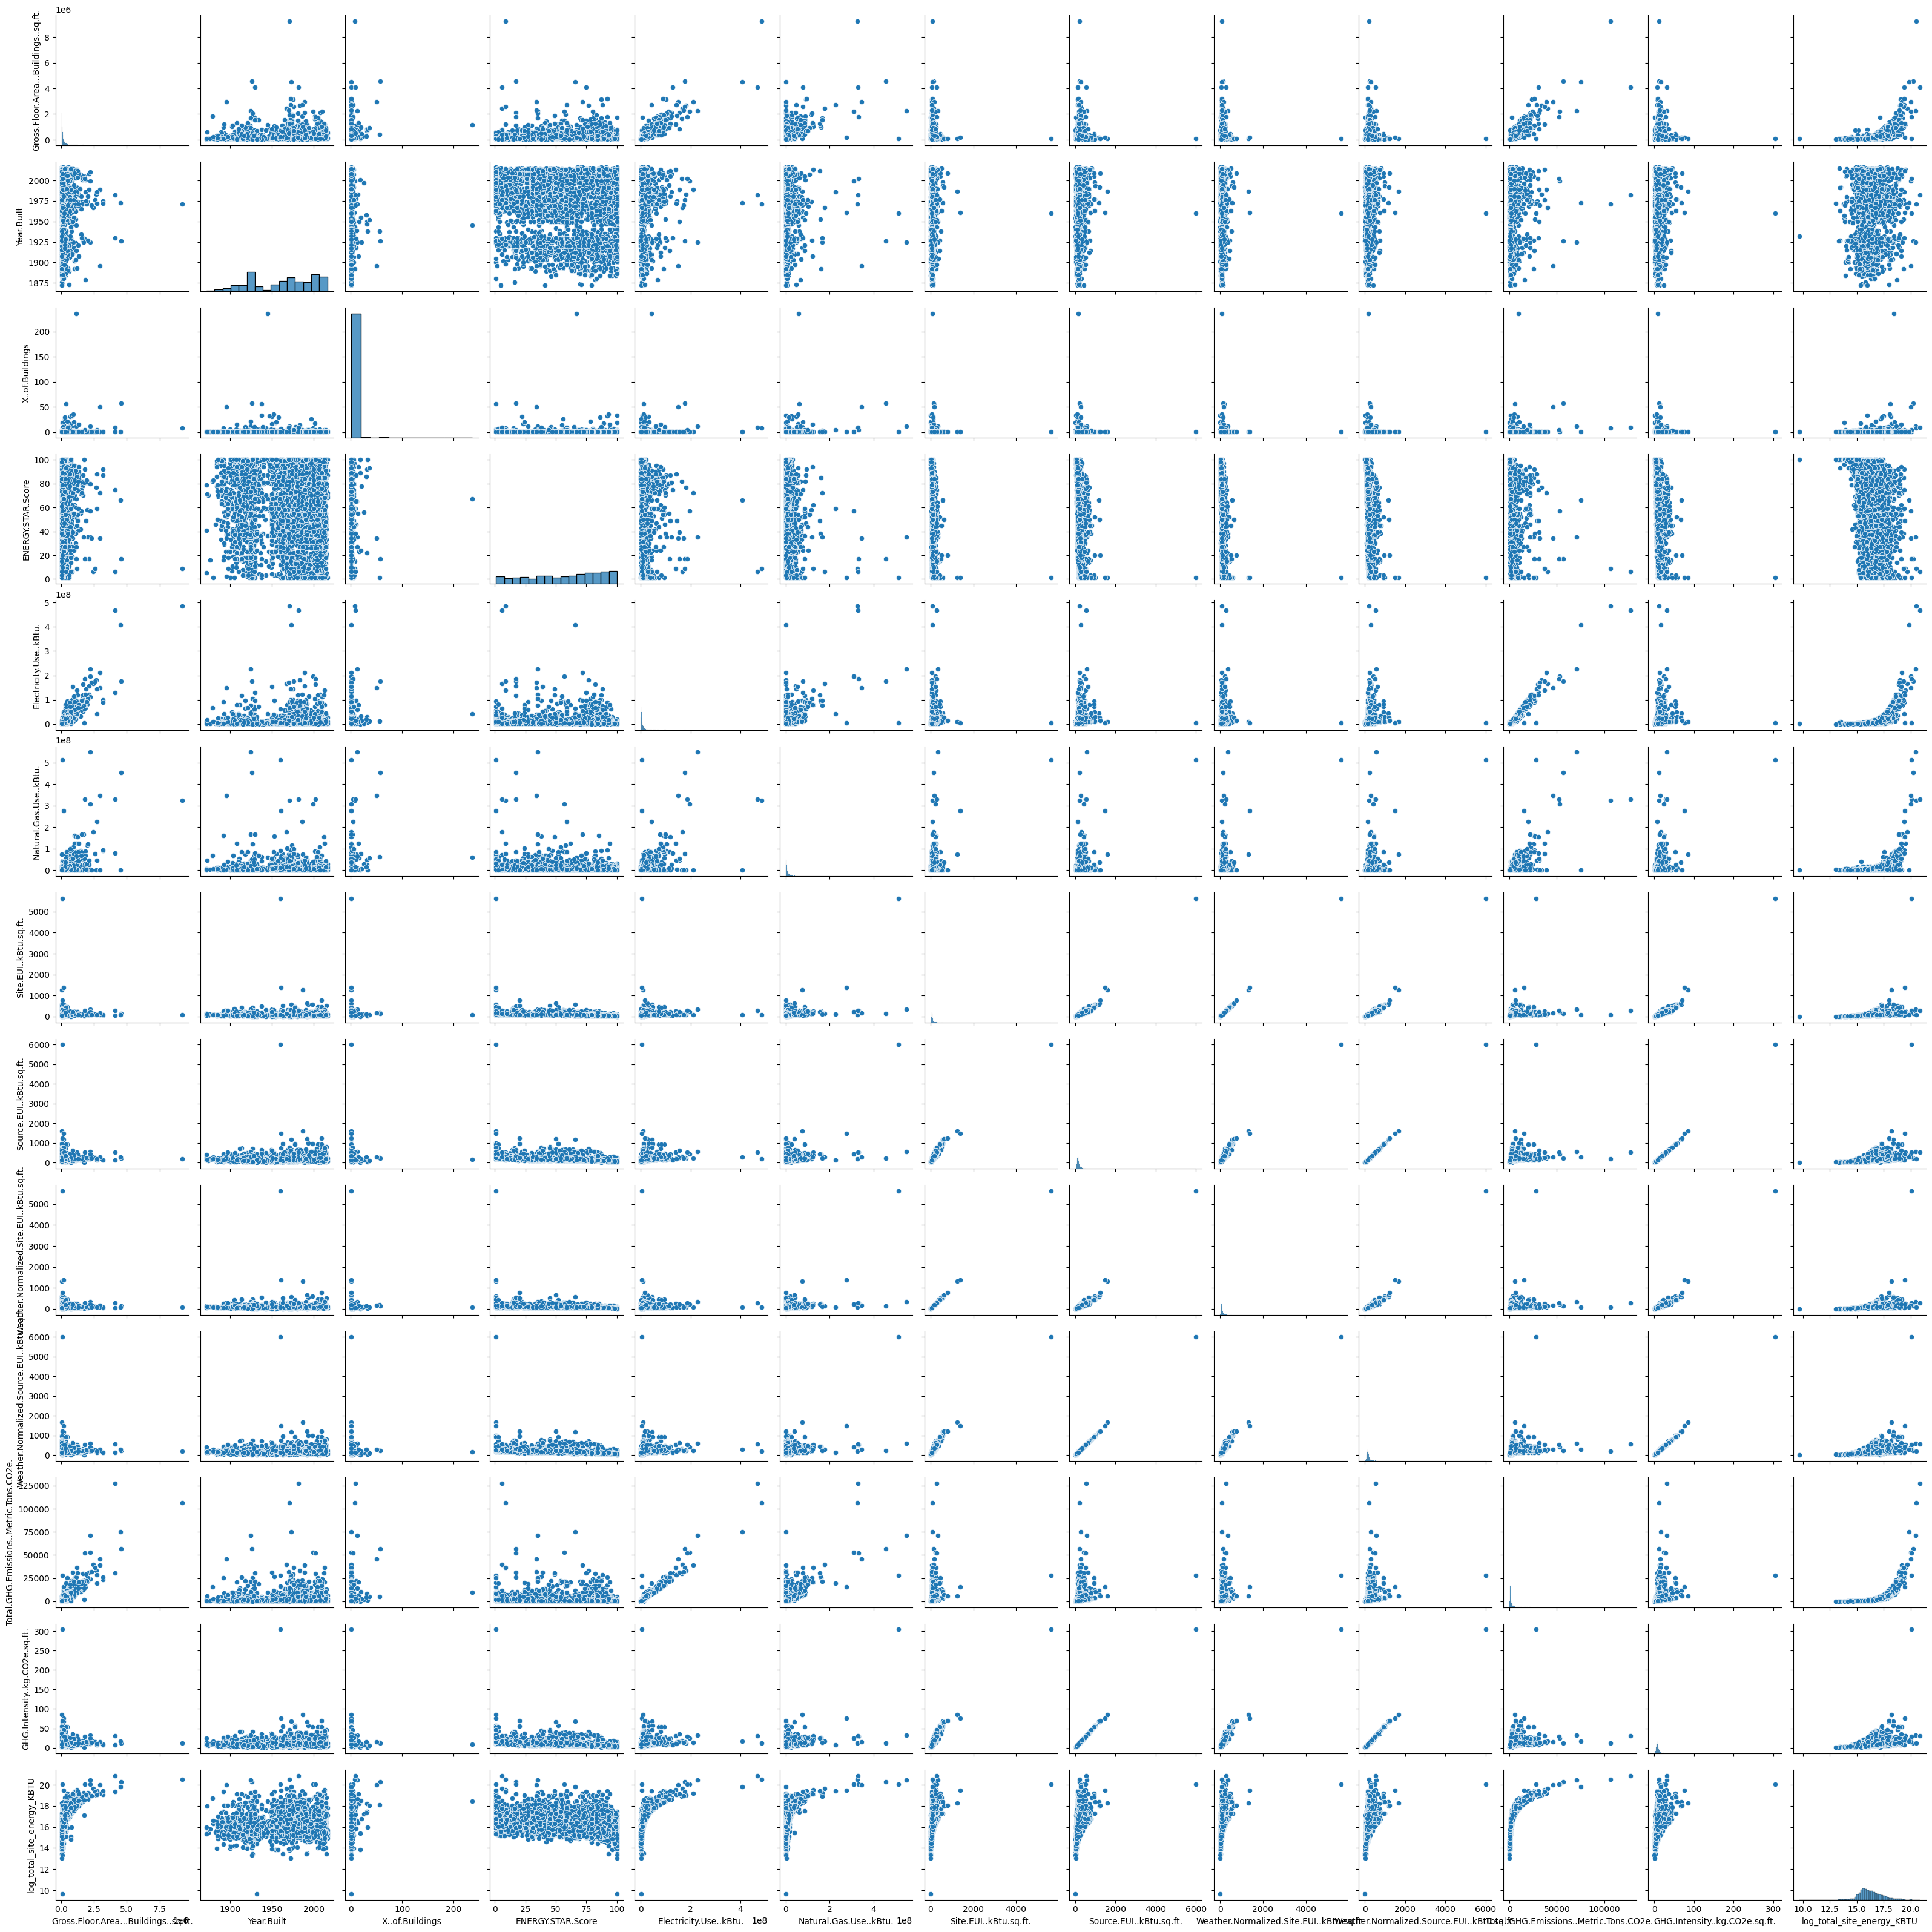

In [21]:
sns.pairplot(X_numeric_data)

####**Figure 6.1:** Plot of pairwise relationships from dataset.
#####**Aside:** Based on the pairplot, 'Site.EUI..kBtu.sq.ft.' is collinear with 'Weather.Normalized.Site.EUI..kBtu.sq.ft.', and 'Source.EUI..kBtu.sq.ft.' is collinear with 'Weather.Normalized.Source.EUI..kBtu.sq.ft.'.

In [22]:
X_numeric_data.drop(['Weather.Normalized.Site.EUI..kBtu.sq.ft.', 'Weather.Normalized.Source.EUI..kBtu.sq.ft.'], axis=1, inplace=True)

In [23]:
X_numeric_data.columns

Index(['Gross.Floor.Area...Buildings..sq.ft.', 'Year.Built', 'X..of.Buildings',
       'ENERGY.STAR.Score', 'Electricity.Use..kBtu.', 'Natural.Gas.Use..kBtu.',
       'Site.EUI..kBtu.sq.ft.', 'Source.EUI..kBtu.sq.ft.',
       'Total.GHG.Emissions..Metric.Tons.CO2e.',
       'GHG.Intensity..kg.CO2e.sq.ft.', 'log_total_site_energy_KBTU'],
      dtype='object')

In [24]:
X_numeric_data.describe()

,Gross.Floor.Area...Buildings..sq.ft.,Year.Built,X..of.Buildings,ENERGY.STAR.Score,Electricity.Use..kBtu.,Natural.Gas.Use..kBtu.,Site.EUI..kBtu.sq.ft.,Source.EUI..kBtu.sq.ft.,Total.GHG.Emissions..Metric.Tons.CO2e.,GHG.Intensity..kg.CO2e.sq.ft.,log_total_site_energy_KBTU
count,2.688000e+03,2688.000000,2688.000000,2688.000000,2.688000e+03,2.688000e+03,2688.000000,2688.000000,2673.000000,2673.000000,2688.000000
mean,2.448678e+05,1962.942336,1.405878,57.507812,1.076602e+07,1.172915e+07,94.208408,180.017820,2630.786495,10.103629,16.304023
std,3.964045e+05,36.294735,5.201993,29.352026,2.495836e+07,2.722341e+07,125.939184,166.056539,5794.436792,9.002384,1.015335
min,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,32.500000,0.400000,9.667765
25%,7.500000e+04,1928.000000,1.000000,34.000000,1.947257e+06,3.182139e+06,61.800000,113.875000,602.100000,6.300000,15.580009
50%,1.237265e+05,1969.000000,1.000000,62.000000,4.024877e+06,5.561839e+06,79.400000,148.100000,1099.500000,8.300000,16.166576
75%,2.521352e+05,1997.000000,1.000000,83.000000,9.702889e+06,1.168477e+07,101.050000,196.575000,2435.700000,11.100000,16.907547
max,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,127610.000000,304.600000,20.867690


In [25]:
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (2688, 11) in the numerical variables


In [26]:
#recheck missing values
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 30 missing or infinity values in the numerical data


In [27]:
#convert to log values

X_numeric_data['log_floor_area'] = np.log10(X_numeric_data['Gross.Floor.Area...Buildings..sq.ft.'])

In [28]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [29]:
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [30]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (2688, 12)
there are 30 missing values in the numerical data


##**TASK 6.2.2 Use Nearest Neighbor Imputer to Impute Missing Values in Numerical Features**
---

In [31]:
imputer = KNNImputer(n_neighbors=3, weights='distance')
Xn = imputer.fit_transform(X_numeric_data)
Xn

array([[9.90000000e+04, 2.00000000e+03, 1.00000000e+00, ...,
        5.10000000e+00, 1.53678065e+01, 4.99563519e+00],
       [9.20720000e+04, 2.01400000e+03, 1.00000000e+00, ...,
        6.80000000e+00, 1.55428380e+01, 4.96412758e+00],
       [1.36000000e+05, 1.92400000e+03, 1.00000000e+00, ...,
        8.50000000e+00, 1.58528793e+01, 5.13353891e+00],
       ...,
       [9.52040000e+04, 2.00800000e+03, 1.00000000e+00, ...,
        1.46000000e+01, 1.60091974e+01, 4.97865520e+00],
       [6.00000000e+04, 1.90800000e+03, 1.00000000e+00, ...,
        8.40000000e+00, 1.51014319e+01, 4.77815125e+00],
       [3.09056000e+05, 1.92800000e+03, 1.00000000e+00, ...,
        1.92000000e+01, 1.78904049e+01, 5.49003718e+00]])

##**Task 6.2.3: Impute Missing Categorical Variables**
---

In [32]:
imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent').set_output(transform='pandas')
Xc = imputer.fit_transform(X_categorical_data)
Xc

,Primary.Property.Type
0,Multifamily Housing
1,Multifamily Housing
2,Multifamily Housing
3,Multifamily Housing
4,Multifamily Housing
...,...
2683,Hospital (General Medical & Surgical)
2684,Multifamily Housing
2685,Other - Mall
2686,Office


##**Task 6.3: One Hot Encode the Categorical Variables**
---

In [33]:
X_categorical_data.describe()

,Primary.Property.Type
count,2688
unique,47
top,Multifamily Housing
freq,1334


In [34]:
ohe = OneHotEncoder(handle_unknown='ignore') # wise to set this: it means if there is an category that is causing an error the code wont break
ohe.fit(Xc) # this is the full feature set: it does not have to be
ohe.categories_ # tells you which ones are the variables that will be transformed to one-hot

[array(['Adult Education', 'Ambulatory Surgical Center',
        'Automobile Dealership', 'Bank Branch', 'College/University',
        'Convention Center', 'Courthouse', 'Enclosed Mall',
        'Financial Office', 'Fitness Center/Health Club/Gym',
        'Hospital (General Medical & Surgical)', 'Hotel', 'Indoor Arena',
        'K-12 School', 'Laboratory', 'Library', 'Lifestyle Center',
        'Medical Office', 'Mixed Use Property', 'Movie Theater',
        'Multifamily Housing', 'Museum', 'Office', 'Other',
        'Other - Education', 'Other - Entertainment/Public Assembly',
        'Other - Lodging/Residential', 'Other - Mall',
        'Other - Public Services', 'Other - Recreation',
        'Other - Services', 'Other - Specialty Hospital',
        'Outpatient Rehabilitation/Physical Therapy', 'Performing Arts',
        'Pre-school/Daycare', 'Prison/Incarceration',
        'Repair Services (Vehicle, Shoe, Locksmith, etc.)',
        'Residence Hall/Dormitory', 'Residential Care Fac

In [35]:
Xc = ohe.fit_transform(Xc).toarray()

In [36]:
ohe.inverse_transform(Xc)

array([['Multifamily Housing'],
       ['Multifamily Housing'],
       ['Multifamily Housing'],
       ...,
       ['Other - Mall'],
       ['Office'],
       ['Hospital (General Medical & Surgical)']], dtype=object)

In [37]:
Xc = pd.DataFrame(Xc, columns=ohe.get_feature_names_out())

In [38]:
Xc.shape

(2688, 47)

In [39]:
#get the name of features after encoding
feature_name_cat = ohe.get_feature_names_out()
feat = np.append(X_numeric_data.columns.values, feature_name_cat)

##**Task 6.4: Recombine your Numerical and Categorical Imput Features and Split your Data into Training and Testing**
---

In [40]:
Xn.shape

(2688, 12)

In [41]:
Xc.shape

(2688, 47)

In [42]:
X = np.hstack([Xn, Xc])
X.shape

(2688, 59)

In [43]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 59 features (!!!)


In [44]:
# make a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##**Task 5: Run a Random Forest Regression Model**
---

In [45]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf_train = rf.fit(X_train, y_train)

In [46]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.85


In [47]:
rf.feature_importances_[:10]

array([0.00125116, 0.00108695, 0.00382798, 0.00171083, 0.01471922,
       0.35422151, 0.        , 0.0006386 , 0.05196235, 0.00121466])

In [48]:
#feat = np.append(X_numeric_data.columns.values, feature_name_cat)
feature_names = feat
len(feature_names)

59

In [49]:
feature_array = []
for feat_names, importances in zip(feat, rf.feature_importances_):
    feature_array.append([feat_names, importances])

feature_array.sort(key=lambda x: x[1], reverse=True)
feature_array = feature_array[:50]

feature_names = np.array([subarray[0] for subarray in feature_array])
tree_feature_importances = np.array([subarray[1] for subarray in feature_array])

<ipython-input-52-7aaade824640>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


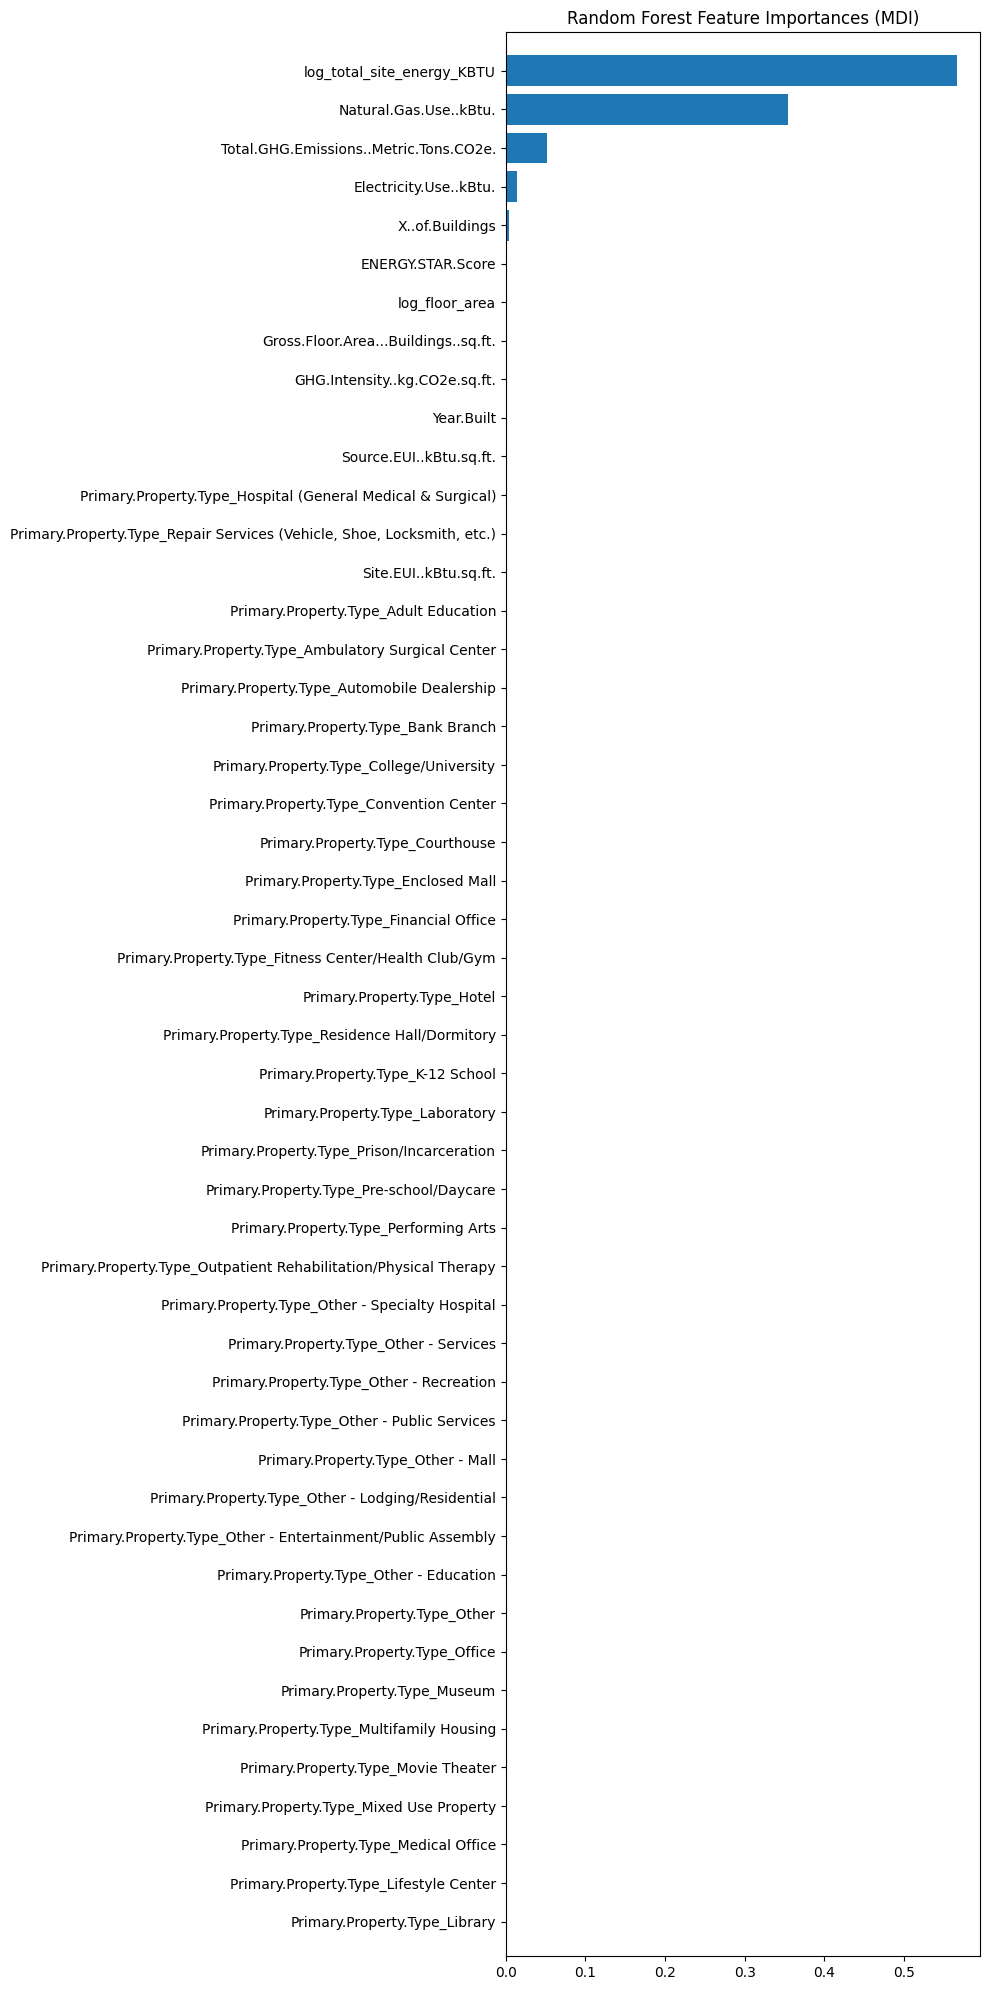

In [52]:
#plotting the top ~50 features (non-zero variables)
import pylab as plt

sorted_idx = np.argsort(tree_feature_importances)

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(0.1, len(feature_names))
plt.show()

####**Figure 6.2:** Feature Importance Model. The model supports the assumption of log total site energy as the most important feature with natural gas as the second highest score, signicantly higher than the following variables. The result provides insight into the substantial impact of natural gas for the Chicago dataset. GHG emissions and electricity use, while smaller than natural gas, are the subsequently ranked scores, indicating relational importance but at a lower magnitude.